In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\AI-lab\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9691358024691358, Loss: 0.22953162369904695
Checkpoint 200, Accuracy: 0.9629629629629629, Loss: 0.21104743745591906
Checkpoint 300, Accuracy: 0.9629629629629629, Loss: 0.19239157217520256
Checkpoint 400, Accuracy: 0.9691358024691358, Loss: 0.17668519196686922
Checkpoint 500, Accuracy: 0.9691358024691358, Loss: 0.16027469988222476


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.9704846  0.00898661 0.02052879]
[0. 0. 1.] <-> [0.8824184  0.00780559 0.10977606]
[1. 0. 0.] <-> [0.9754215  0.00961917 0.01495931]
[1. 0. 0.] <-> [0.58398265 0.38043278 0.03558454]
[0. 1. 0.] <-> [0.05254986 0.9368667  0.01058348]
[1. 0. 0.] <-> [0.976713   0.0057452  0.01754187]
[1. 0. 0.] <-> [0.9681836  0.01377979 0.01803657]
[0. 0. 1.] <-> [0.03050663 0.00136413 0.9681293 ]
[1. 0. 0.] <-> [0.9468345  0.03305782 0.02010772]
[1. 0. 0.] <-> [0.9633425  0.01653566 0.02012191]
[0. 0. 1.] <-> [0.0296084  0.00133985 0.9690517 ]
[1. 0. 0.] <-> [0.23950805 0.7342625  0.02622943]
[0. 1. 0.] <-> [0.05257916 0.93684816 0.01057267]
[1. 0. 0.] <-> [0.9699187  0.00598597 0.02409527]
[1. 0. 0.] <-> [0.97682375 0.0071839  0.01599232]
[0. 1. 0.] <-> [0.13567601 0.8454952  0.01882878]
[0. 0. 1.] <-> [0.21799667 0.00487466 0.77712864]
[1. 0. 0.] <-> [0.77313966 0.01076701 0.2160933 ]
[0. 1. 0.] <-> [0.05936632 0.9291873  0.01144636]
[0. 0. 1.] <-> [0.32938993 0.00598505 0.66462505]


In [12]:
# Testing Performance

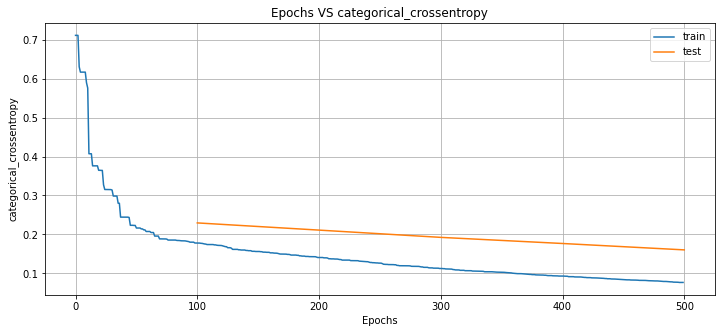

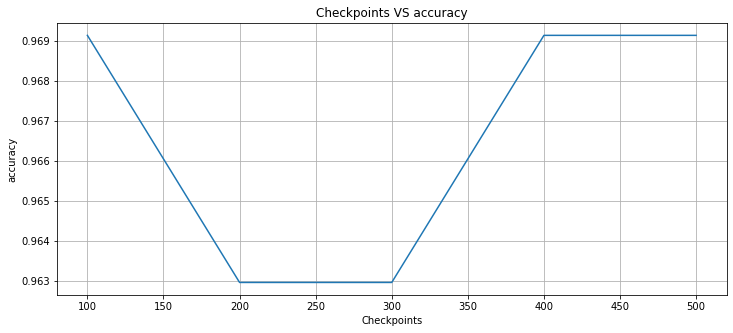

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9691358024691358, 'mean_square_error': 0.10753985072340437, 'categorical_crossentropy': 0.22953162369904695, 'precision': 0.9537037037037037, 'recall': 0.9537037037037037, 'f1': 0.9537037037037037, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 3, 'tn_hit': 27, 'fn_hit': 2}, 1: {'tp_hit': 16, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 0}, 2: {'tp_hit': 11, 'fp_hit': 1, 'tn_hit': 93, 'fn_hit': 3}}, 'checkpoint': 100} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.0998498384836261, 'categorical_crossentropy': 0.21104743745591906, 'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1': 0.9444444444444444, 'essential_metrics': {0: {'tp_hit': 75, 'fp_hit': 3, 'tn_hit': 27, 'fn_hit': 3}, 1: {'tp_hit': 16, 'fp_hit': 2, 'tn_hit': 90, 'fn_hit': 0}, 2: {'tp_hit': 11, 'fp_hit': 1, 'tn_hit': 93, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.09427563474663225, 'categorical_crossentropy': 0.19239157217520256, 'precis

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-0.5232113   1.8731948   2.1773496  -2.218183   -0.76320255]
 bias: -1.5313842296600342

Neuron 1: weights:
[ 1.4829521 -2.5119224  2.821015   2.7829988  2.6669755]
 bias: -2.9434425830841064

Neuron 2: weights:
[ 0.7437742 -2.2435606 -1.7259337  1.2873365  2.8039508]
 bias: -2.4686195850372314

Neuron 3: weights:
[ 1.5686066  -2.829727   -3.          0.73070866  0.01921358]
 bias: 1.8081719875335693

$
Layer 2
Neuron 0: weights:
[-2.9574778 -2.5602431 -2.850595   2.9631612]
 bias: 2.4572551250457764

Neuron 1: weights:
[-0.51867217 -1.5417478  -1.4441887  -3.        ]
 bias: 2.898651599884033

Neuron 2: weights:
[-2.9221072   0.2660331   2.3791397   0.03420766]
 bias: 0.8178087472915649

$

